In [ ]:
#! usr/bin/env python3

import cv2
import pytesseract
from matplotlib import pyplot as plt

In [ ]:
image_path = "images/pump/pump1_cut.png"

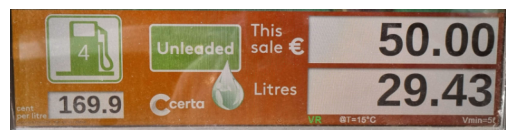

In [ ]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(image)

In [ ]:
print(text)